# Project 1 - Kinematics of Stewart platform

## Team:
### 1. Ankit Kumar Aggarwal
### 2. Avinash Rajaraman Swaminathan
### 3. Sayed Raheel Hussain

## Activity 1
### The parameters L1, L2, L3,γ, x1, x2, y2 are fixed constants, and the strut lengths p1, p2, p3 will be known for a given pose. Check Appendix B.5 if you are new to MATLAB function files. Here, for free, are the first and last lines: 

function out=f(theta)

:

:

out=N1^2+N2^2-p1^2*D^2;

### To test your code, set the parameters L1 = 2, L2 = L3 = √2,γ = π/2, p1 = p2 =p3 = √5 from Figure 1.15. Then, substituting θ = −π/4 or θ = π/4, corresponding to Figures 1.15(a, b), respectively, should make f (θ) = 0.

In [357]:
#Import required libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [358]:
#Initializing the stewart_theta function that will take theta as an input argument and return out. 
def stewart_theta(theta):
    # Define the fixed link lengths
    L1 = 2
    L2 = L3 = np.sqrt(2)
    
    # Define the angles for the Stewart Platform
    gamma = np.pi/2
    
    # Define the struts lengths
    p1 = p2 = p3 = np.sqrt(5)
    
    # Define the coordinates of point 2
    x1 = 4
    x2 = 0
    y2 = 4
    
    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta) - x1
    B2 = L3*np.sin(theta)
    
    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma)) - (np.sin(theta)*np.sin(gamma))) - x2
    B3 = L2*((np.cos(theta)*np.sin(gamma)) + (np.sin(theta)*np.cos(gamma))) - y2
    
    # Calculate the terms for the equations of the circles
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)
    
    # Calculate the coordinates of point 1 in the Stewart Platform
    x = N1/D
    y = N2/D
    
    # Calculate the output of the equations of the circles
    out = N1**2 + N2**2 - p1**2*(D**2)
    
    return x, y, out

In [359]:
#Substitute theta = "pi/4" and execute the function
stewart_theta(np.pi/4)

(2.0, 1.0, -4.547473508864641e-13)

In [360]:
#Substitute theta = "-pi/4" and execute the function
stewart_theta(-np.pi/4)

(1.0, 2.0, -4.547473508864641e-13)

### This function computes the position of a point P (x,y) relative to a Stewart platform. 

- In this function, we assume that the lengths of the six struts are fixed and known. We also assume that the platform is constrained to move in a plane. 
	
- The function takes as input an angle theta that determines the position of the moving platform relative to the fixed base
	
- The function returns the x and y coordinates of point P on the platform, as well as an output of the equation of the circles, if 'out' which is equal to zero, the Stewart Platform is in a fully constrained state and required position is reached

##  Activity 2

### Plot f (θ) on [−π,π]. You may use the @ symbol as described in Appendix B.5 to assign a function handle to your function file in the plotting command. You may also need to precede arithmetic operations with the “.” character to vectorize the operations, as explained in Appendix B.2. As a check of your work, there should be roots at ± π/4.

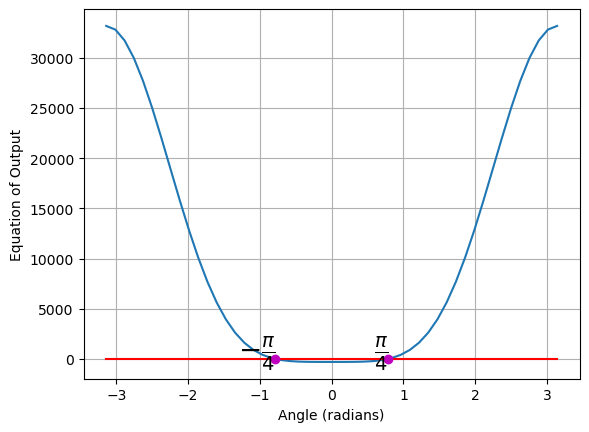

In [361]:
# Defining the vectorize function for the stewart_theta function, for element-wise arithmetic operations to the output array
stewart_function = np.vectorize(lambda theta: stewart_theta(theta)[2])

# Define the x-axis limits
a = -np.pi
b = np.pi

# Define the x-values where to evaluate f(θ)
x_values = np.linspace(a, b)

# Evaluate f(theta) at the x_values using the stewart_function handle
y_values = stewart_function(x_values)

# Plot the function f(θ)
plt.plot(x_values, y_values)

# Plot the x-axis (y=0)
plt.plot([a, b], [0, 0], 'r')

# Plot the two points (pi/4, 0) and (-pi/4, 0) and add the values as text
plt.plot([np.pi/4, -np.pi/4], [0, 0], 'mo')
plt.text(np.pi/4, 0.02, r'$\frac{\pi}{4}$', ha='right',fontsize=20)
plt.text(-np.pi/4, 0.02, r'$-\frac{\pi}{4}$', ha='right',fontsize=20)

# Add a grid to the plot
plt.grid(True)

# Set x-axis and y-axis labels
plt.xlabel('Angle (radians)')
plt.ylabel('Equation of Output')

# Show the plot
plt.show()

- plt.plot([np.pi/4, -np.pi/4], [0, 0], 'mo'), where 'mo' specifies that the points should be marked with magenta circles 


- If there are roots of the function at ±π/4, the plot should cross the x-axis at those points, and the points marked on the plot should be very close to the x-axis


- By inspecting the plot, we can see that the function does cross the x-axis at ±π/4, and the points marked on the plot are very close to the x-axis, which indicates that these are the roots of the function


- Therefore, we can conclude that the implementation of the function is correct and consistent with the expected behavior of the Stewart platform

## Activity 3

### Reproduce Figure 1.15. The MATLAB commands

    plot([u1 u2 u3 u1],[v1 v2 v3 v1],’r’); hold on

    plot([0 x1 x2],[0 0 y2],’bo’)

### will plot a red triangle with vertices (u1,v1),(u2,v2),(u3,v3) and place small circles at the strut anchor points (0,0),(x1,0),(x2,y2). In addition, draw the struts.

In [362]:
def stewart_theta_minus_pi_by_4(theta):
    
    # Define the fixed link lengths
    L1 = 2
    L2 = L3 = np.sqrt(2)
    
    # Define the angles for the Stewart Platform
    gamma = np.pi/2
    
    # Define the leg lengths
    p1 = p2 = p3 = np.sqrt(5)
    
    # Define the coordinates of point 2
    x1 = 4
    x2 = 0
    y2 = 4
    
    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta) - x1
    B2 = L3*np.sin(theta)
    
    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma)) - (np.sin(theta)*np.sin(gamma))) - x2
    B3 = L2*((np.cos(theta)*np.sin(gamma)) + (np.sin(theta)*np.cos(gamma))) - y2
    
    # Calculate the terms for the equations of the circles
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)
    
    # Calculate the coordinates of point 1 in the Stewart Platform
    x = N1/D
    y = N2/D
    
    # Calculate the output of the equations of the circles
    out = N1**2 + N2**2 - p1**2*(D**2)
    
    # The points
    u1 = 1
    v1 = 2

    u2 = 2
    v2 = 3

    u3 = 2
    v3 = 1

    # The Plot 
    plt.plot([1, 2, 2, 1], [2, 3, 1, 2], 'r')
    plt.plot([0, x1, x2], [0, 0, y2], 'bo')
    
    plt.plot([0, 1], [0, 2],'g')
    plt.plot([4, 2], [0, 1],'g')
    
    plt.plot([0, 2], [4, 3],'g')
    
    # Add blue circles at the anchor points
    plt.plot(u1, v1, 'bo', markersize=5)
    plt.plot(u2, v2, 'bo', markersize=5)
    plt.plot(u3, v3, 'bo', markersize=5)
    plt.plot(0, 0, 'bo', markersize=5)
    plt.plot(x1, 0, 'bo', markersize=5)
    plt.plot(x2, y2, 'bo', markersize=5)

    plt.xlim()
    plt.grid(True)

    plt.show()
    
def stewart_theta_pi_by_4(theta):
    L1 = 2
    L2 = L3 = np.sqrt(2)
    gamma = np.pi/2
    p1 = p2 = p3 = np.sqrt(5)
    
    #Inputs based on the fig 1.15 where x1=4, x2=0, y2=4
    x1=4
    x2=0
    y2=4

    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)
    
    x=N1/D
    y=N2/D
    
    #output
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    # The points
    u1 = 2
    v1 = 1

    u2 = 1
    v2 = 2

    u3 = 3
    v3 = 2


    # The Plot 
    plt.plot([2, 1, 3, 2], [1, 2, 2, 1], 'r')
    plt.plot([0, x1, x2], [0, 0, y2], 'bo')
    
    plt.plot([0, 2], [0, 1],'g')
    plt.plot([4, 3], [0, 2],'g')
    
    plt.plot([0, 1], [4, 2],'g')
    
    # Add blue circles at the anchor points
    plt.plot(u1, v1, 'bo', markersize=5)
    plt.plot(u2, v2, 'bo', markersize=5)
    plt.plot(u3, v3, 'bo', markersize=5)
    plt.plot(0, 0, 'bo', markersize=5)
    plt.plot(x1, 0, 'bo', markersize=5)
    plt.plot(x2, y2, 'bo', markersize=5)

    plt.xlim()
    plt.grid(True)

    plt.show()

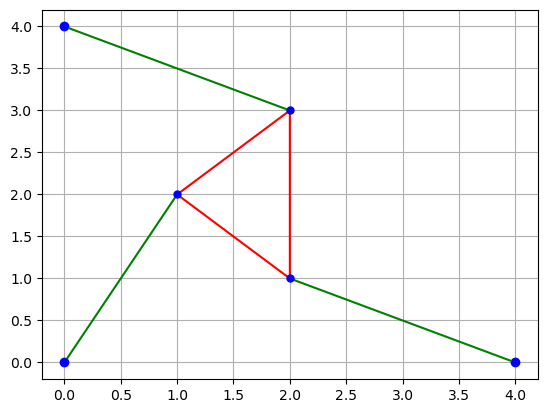

In [363]:
# Test the function
stewart_theta_minus_pi_by_4(-np.pi/4)

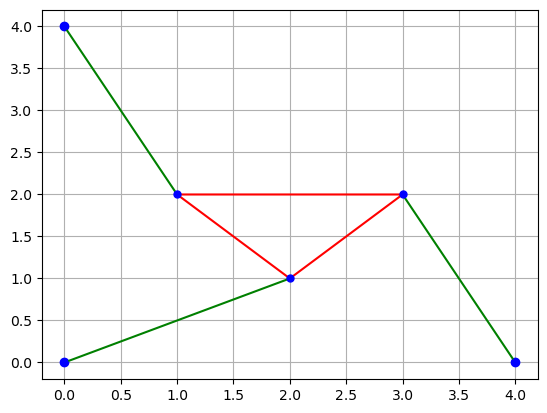

In [364]:
# Test the function
stewart_theta_pi_by_4(np.pi/4)

- At theta = 0, the platform is at initial position, with all the legs at the same height and the platform is parallel to the ground. At this position, the output value of the function should be equal to the square of the length of one of the legs (in this case, p1 = sqrt(5)), since all the other legs are also at the same height.

## Activity 4

### Solve the forward kinematics problem for the planar Stewart platform specified by 

### x1 = 5,(x2, y2) = (0,6), L1 = L3 = 3, L2 = 3√2,γ = π/4, p1 = p2 = 5, p3 = 3. 

### Begin by plotting f (θ). Use an equation solver to find all four poses, and plot them. Check your answers by verifying that p1, p2, p3 are the lengths of the struts in your plot.

In [365]:
def forward_kinematics(theta):
    
    # Define the link lengths
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    gamma = np.pi/4
    p1 = p2 = 5
    p3 = 3
    
    # Define the coordinates of point 2
    x1=5
    x2=0
    y2=6

    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    
    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    # Calculate the terms for the equations of the circles
    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)
    
    x=N1/D
    y=N2/D
    
    # Calculate the output of the equations of the circles
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return out

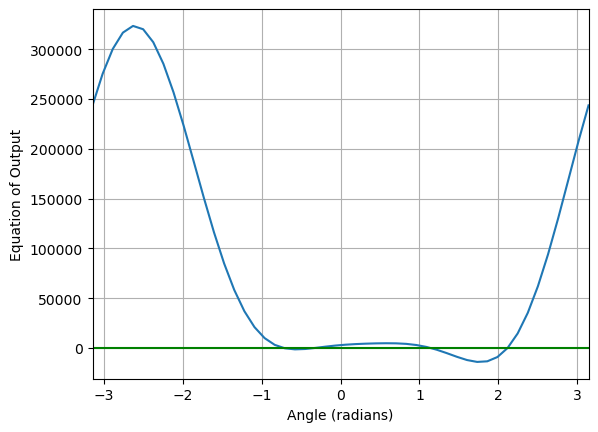

In [366]:
a = -np.pi
b = np.pi

xvalues = np.linspace(a, b)

# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Set x-axis and y-axis labels
plt.xlabel('Angle (radians)')
plt.ylabel('Equation of Output')

# Show the plot
plt.show()

## Centering on curves to find roots

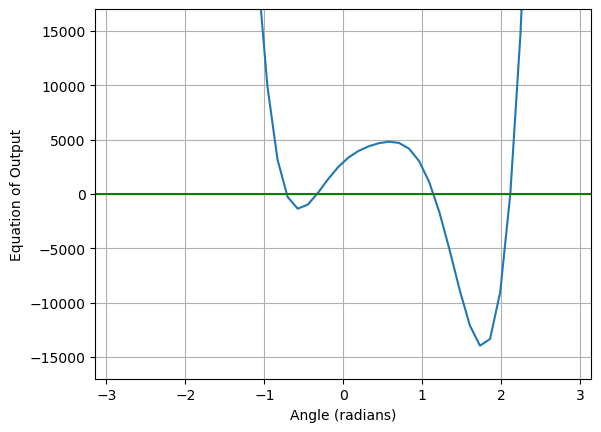

In [367]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Set x-axis and y-axis labels
plt.xlabel('Angle (radians)')
plt.ylabel('Equation of Output')

# Show the plot
plt.show()

## Code for BISECTION Method

In [1]:
def bisection(f, a, b, tol, max_iter):
    function_a = f(a)
    function_b = f(b)

    # Check that the function values at a and b have opposite signs
    if function_a * function_b > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    # Iterate using the bisection method
    for i in range(max_iter):
        # Calculate the midpoint and the function value at the midpoint
        c = (a + b) / 2
        function_c = f(c)

        # Update either a or b depending on the sign of f(a)*f(c)
        if function_a * function_c < 0:
            b = c
            function_b = function_c
        else:
            a = c
            function_a = function_c

        # Check if the interval [a, b] is smaller than the tolerance tol
        if (b - a)/2 <= tol:
            break

    # Return the estimate of the root
    return c

## Extract the roots from the functions

Root: -0.7208492044598714
Root: -0.3310051842827705
Root: 1.1436855178208596
Root: 2.115909014084604


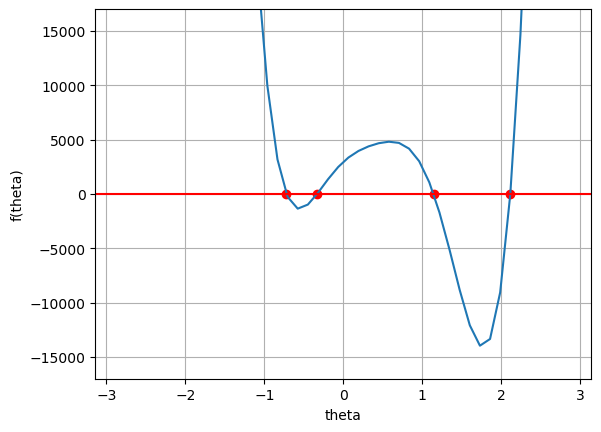

In [369]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
xvalues = np.linspace(-np.pi, np.pi)

yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'r')

# Find the roots of the function
tol = 1e-12
roots = []

for i in range(len(xvalues)-1):
    
    if forward_kinematics(xvalues[i])*forward_kinematics(xvalues[i+1]) < 0:
        
        a, b = xvalues[i], xvalues[i+1]
        n = int(np.ceil(np.log2((b-a)/tol)))
        
        root = bisection(forward_kinematics, a, b, tol, n)
        
        roots.append(root)
        
        print("Root:", root)

# Plot the roots on the curve
for root in roots:
    plt.scatter(root, forward_kinematics(root), c='red')

# Add a grid to the plot
plt.grid(True)

plt.xlabel("theta")
plt.ylabel("f(theta)")

# Show the plot
plt.show()

- Now we have the four roots extracted from bisection: 

        -0.7208486822970133

        −0.33100527019002235

        1.1436863776005795

        2.1159093133838343

In [370]:
def forward_kinematics(theta):
    
    # Define the lengths of the links and legs
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    
    # Define the angles for the Stewart Platform
    gamma = np.pi/4
    p1 = p2 = 5
    p3 = 3
    
    #Inputs based on the fig 1.15 where x1=4, x2=0, y2=4
    x1=5
    x2=0
    y2=6

    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)

    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    # Calculate the terms for the equations of the circles
    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)

    # Calculate the coordinates of point 1 in the Stewart Platform
    x=N1/D
    y=N2/D

    # Calculate the output of the equations of the circles
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return x,y, out

### Finding x, y, out for each of the identified theta.

In [371]:
root_1 = -0.7208486822970133
values_1 = forward_kinematics(root_1)
values_1

(-1.3783796529728198, 4.806252733212699, -0.0097575363543001)

In [372]:
root_2 = -0.33100527019002235
values_2 = forward_kinematics(root_2)
values_2

(-0.9147089624578358, 4.915618601429166, -0.0008209647585317725)

In [373]:
root_3 = 1.1436863776005795
values_3 = forward_kinematics(root_3)
values_3

(4.48174823932921, 2.2167316910137442, -0.018179710607000743)

In [374]:
root_4 = 2.1159093133838343
values_4 = forward_kinematics(root_4)
values_4

(4.571830313270758, 2.0244434405504936, 0.02740930297295563)

In [375]:
theta_list = [i[0:2] for i in [values_1, values_2, values_3, values_4]]
print(theta_list)

[(-1.3783796529728198, 4.806252733212699), (-0.9147089624578358, 4.915618601429166), (4.48174823932921, 2.2167316910137442), (4.571830313270758, 2.0244434405504936)]


## Code to find the missing coordinates values of the platform and plot it using other given parameters.

In [376]:
def stewart_theta_bisection_roots(x, y, theta):
    # Set the constants for the Stewart platform
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    gamma = np.pi/4
    p1 = p2 = 5
    p3 = 3
    
    # Set the anchor point positions
    x1 = 5
    x2 = 0
    y2 = 6

    # Calculate the values of A2, B2, A3, and B3
    A2 = L3 * np.cos(theta) - x1
    B2 = L3 * np.sin(theta)
    A3 = L2 * ((np.cos(theta) * np.cos(gamma)) - (np.sin(theta) * np.sin(gamma))) - x2
    B3 = L2 * ((np.cos(theta) * np.sin(gamma)) + (np.sin(theta) * np.cos(gamma))) - y2

    # Calculate the values of N1, N2, and D
    N1 = B3 * (p2**2 - p1**2 - A2**2 - B2**2) - B2 * (p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3 * (p2**2 - p1**2 - A2**2 - B2**2) + A2 * (p3**2 - p1**2 - A3**2 - B3**2)
    D = 2 * (A2 * B3 - B2 * A3)
    
    # Calculate the values of x, y, and out
    x = N1 / D
    y = N2 / D
    out = N1**2 + N2**2 - p1**2 * (D**2)
    
    # Calculate the positions of the moving platform points
    u1 = x
    v1 = y

    u2 = x + (L2 * np.cos(theta + gamma))
    v2 = y + (L2 * np.sin(theta + gamma))

    u3 = x + (L3 * np.cos(theta)) 
    v3 = y + (L3 * np.sin(theta)) 

    # Plot the Stewart platform
    plt.plot([u1, u2, u3, u1], [v1, v2, v3, v1], 'r')
    plt.plot([0, x1, x2], [0, 0, y2], 'bo')
    
    plt.plot([0, u1], [0, v1],'g')
    plt.plot([x2, u2], [y2, v2],'g')
    plt.plot([x1, u3], [0, v3],'g')

    # Add blue circles at the anchor points and the origin
    plt.plot(u1, v1, 'bo', markersize=5)
    plt.plot(u2, v2, 'bo', markersize=5)
    plt.plot(u3, v3, 'bo', markersize=5)
    plt.plot(0, 0, 'bo', markersize=5)
    plt.plot(x1, 0, 'bo', markersize=5)
    plt.plot(x2, y2, 'bo', markersize=5)

    plt.grid(True)

    plt.show()

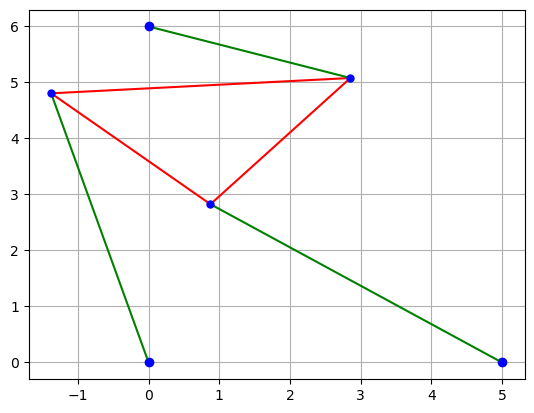

In [377]:
stewart_theta_bisection_roots(theta_list[0][0],theta_list[0][1],root_1)

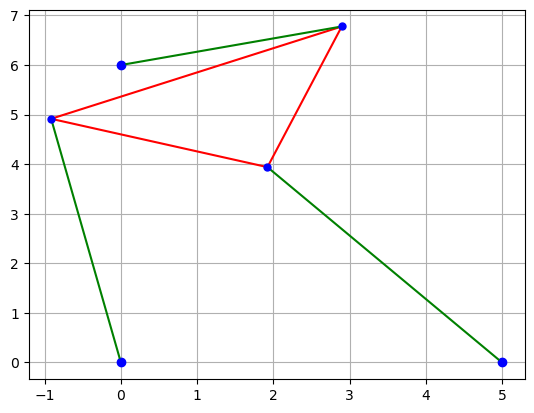

In [378]:
stewart_theta_bisection_roots(theta_list[1][0],theta_list[1][1],root_2)

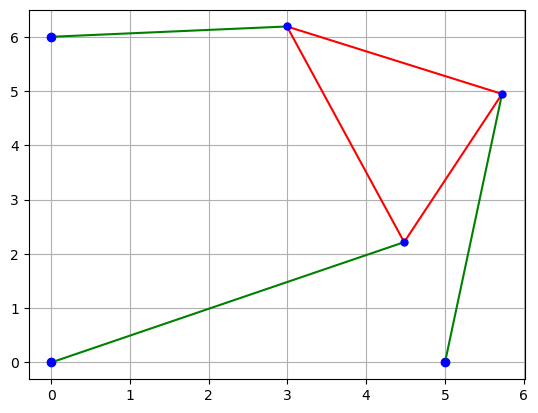

In [379]:
stewart_theta_bisection_roots(theta_list[2][0],theta_list[2][1],root_3)

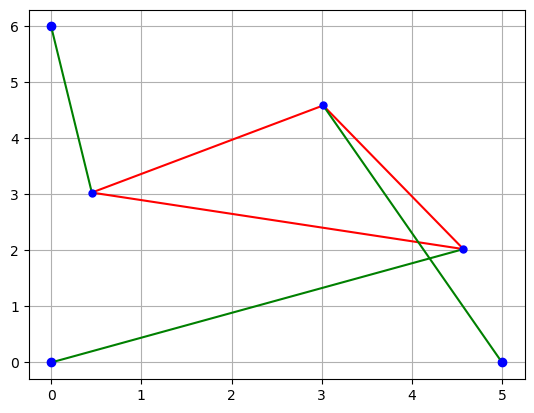

In [380]:
stewart_theta_bisection_roots(theta_list[3][0],theta_list[3][1],root_4)

### Code to find the Iterations and Accuracy for the identified Roots using Bisection Method

In [381]:
def forward_kinematics1(theta):
    
    # Define the lengths of the links and legs
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    
    # Define the angles for the Stewart Platform
    gamma = np.pi/4
    p1 = p2 = 5
    p3 = 3
    
    #Inputs based on the fig 1.15 where x1=4, x2=0, y2=4
    x1=5
    x2=0
    y2=6

    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)

    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    # Calculate the terms for the equations of the circles
    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)

    # Calculate the coordinates of point 1 in the Stewart Platform
    x=N1/D
    y=N2/D

    # Calculate the output of the equations of the circles
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return out

In [382]:
#code for accuracy and iteration and roots
def bisection_For_Accuracy(f, a, b, tol,max_iter=100):
    function_a = f(a)
    function_b = f(b)

    if function_a * function_b > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    iterations = 0
    accuracy = (b - a) / 2

    while (b - a)/2 > tol:
        c = (a + b) / 2
        function_c = f(c)

        if function_a * function_c < 0:
            b = c
            function_b = function_c
        else:
            a = c
            function_a = function_c
            iterations += 1
            accuracy = (b - a) / 2
            
            

    return c,iterations,accuracy

In [383]:
#code to pass interval for bisection
# Evaluate f(theta) at the x_values
xvalues = np.linspace(-np.pi, np.pi)


# Find the roots of the function
xvalues = np.linspace(-np.pi, np.pi)
tol = 1e-12
roots = []
itera=[]
accu=[]
for i in range(len(xvalues)-1):
    if forward_kinematics1(xvalues[i])*forward_kinematics1(xvalues[i+1]) < 0:
        
        root,iteration,accuracy = bisection_For_Accuracy(forward_kinematics1, xvalues[i], xvalues[i+1], tol)
        
        roots.append(root)
        itera.append(iteration)
        accu.append(accuracy)
        
print("Root:", roots)
print("Iterations:", itera)
print("Accuracy:",accu)

Root: [-0.7208492044598714, -0.3310051842827705, 1.1436855178208596, 2.115909014084604]
Iterations: [20, 20, 19, 13]
Accuracy: [3.7319591861262325e-12, 1.8659518374875006e-12, 9.330314298949816e-13, 9.330314298949816e-13]


## Accuracy for each of the roots

In [384]:
#display root and their corresponding Accuracy

import pandas as pd
data={"Root":roots, "Accuracy":accu}
res=pd.DataFrame(data)
res

,Root,Accuracy
0,-0.720849,3.731959e-12
1,-0.331005,1.865952e-12
2,1.143686,9.330314e-13
3,2.115909,9.330314e-13


## Number of Iteration for each of the roots

In [385]:
#display root and their corresponding Iteration

import pandas as pd
data={"Root":roots, "Iterations":itera}
res=pd.DataFrame(data)
res

,Root,Iterations
0,-0.720849,20
1,-0.331005,20
2,1.143686,19
3,2.115909,13


## Relative Error for the Bisection Method

In [386]:
# root[i] is the current root and root[i-1] is the previous root. We divide the absolute difference between 
# these two roots by the absolute value of the current root to obtain the relative error
def check_accuracy(roots, tol):
    for i in range(1, len(roots)):
        relative_error = abs(roots[i] - roots[i-1]) / abs(roots[i])
        if relative_error > tol:
            print("Root", roots[i], "has a relative error of", round(relative_error,3),"%")


tol = 1e-12

check_accuracy(roots, tol)

Root -0.3310051842827705 has a relative error of 1.178 %
Root 1.1436855178208596 has a relative error of 1.289 %
Root 2.115909014084604 has a relative error of 0.459 %


## Finding Roots, Accuracy and Relative Error for the Newton's Method

In [432]:
def forward_kinematics_derivative(theta):
    delta = 1e-9
    return (forward_kinematics1(theta + delta) - forward_kinematics1(theta)) / delta

def newton_method(f, f_prime, x_0, tol, max_iter):
    x = x_0
    iter_count = 0
    root_found = False
    while iter_count < max_iter:
        f_val = f(x)
        f_prime_val = f_prime(x)
        x_new = x - f_val / f_prime_val
        if abs(x_new - x) < tol:
            root_found = True
            break
        x = x_new
        iter_count += 1
    if root_found:
        accuracy = abs(f_val)
        return x_new, iter_count, accuracy
    else:
        return None, iter_count, None

# Define the initial guesses, tolerance, and maximum number of iterations
x_0 = [0.5, 2.5, 3.5, 5.5]
tol = 1e-12
max_iter = 1000

# Use Newton's method to find the n_roots
n_roots = []
accuracies = []

# Apply the root-finding algorithm to each initial condition
for x0 in x_0:
    # Use Newton's method to find the root
    root, num_iters, accuracy = newton_method(forward_kinematics1, forward_kinematics_derivative, x0, tol, max_iter)
    # Check if the root is not already found
    if root is not None and not any(abs(root - r) < tol for r in n_roots):
        n_roots.append(root)
        accuracies.append(accuracy)

# Print the results
if len(n_roots) > 0:
    print("The n_roots of the function are approximately:", n_roots)
    print("The corresponding accuracies are:", accuracies)

The n_roots of the function are approximately: [-4.1672762930931295, 2.115909014086458, -6.6141904914634555, 5.562336102719197]
The corresponding accuracies are: [2.9103830456733704e-11, 8.198549039661884e-08, 7.821654435247183e-11, 0.0]


In [434]:
def check_accuracy(roots, tol):
    for i in range(1, len(roots)):
        relative_error = abs(roots[i] - roots[i-1]) / abs(roots[i])
        if relative_error > tol:
            print("Root", roots[i], "has a relative error of", round(relative_error,3),"%")


tol = 1e-12

check_accuracy(n_roots, tol)

Root 2.115909014086458 has a relative error of 2.969 %
Root -6.6141904914634555 has a relative error of 1.32 %
Root 5.562336102719197 has a relative error of 2.189 %


## Convergence Rate for the identified roots (Bisection Method)

In [389]:
def bisection_for_speed(f, a, b, tol, maxiter):
    roots = []
    errors = []
    convergence_rate = None
    
    if f(a)*f(b) >= 0:
        raise ValueError("Bisection method is not applicable to the given function and interval.")
    
    prev_c = None
    prev_error = None
    
    for i in range(maxiter):
        c = (a + b) / 2
        error = abs(b - a) / 2
        
        if prev_c is not None and prev_error is not None:
            ratio = error / prev_error
            if ratio == 0:
                convergence_rate = 0
                break
            convergence_rate = math.log(ratio) / math.log(0.5)
        
        roots.append(c)
        errors.append(error)
        
        if error < tol:
            break
        
        if f(c) == 0:
            break
        
        if f(c)*f(a) < 0:
            b = c
        else:
            a = c
        
        prev_c = c
        prev_error = error
    
    if convergence_rate is None:
        convergence_rate = 0
    
    return c, error, convergence_rate

#code to pass interval for bisection
# Evaluate f(theta) at the x_values
xvalues = np.linspace(-np.pi, np.pi)


# Find the roots of the function
xvalues = np.linspace(-np.pi, np.pi)
tol = 1e-12
roots = []
conver=[]
erro=[]
for i in range(len(xvalues)-1):
    if forward_kinematics1(xvalues[i])*forward_kinematics1(xvalues[i+1]) < 0:
        
        approx_roots,errors,convergence_rate = bisection_for_speed(forward_kinematics1, xvalues[i], xvalues[i+1], tol,1000)
        
        roots.append(approx_roots)
        erro.append(errors)
        conver.append(convergence_rate)



In [390]:
#Finally, we calculate the convergence rate using the last ratio value (since we assume the bisection method has converged) 
#and the fact that the error decreases by a factor of 0.5 with each iteration. We take the logarithm of the ratio, 
#and divide it by the logarithm of 0.5: The resulting convergence rate variable should be close to 1 if the 
#bisection method has linear convergence.

print("Roots:",roots)        
print("Convergence Rate:",conver)


Roots: [-0.7208492044608044, -0.33100518428370346, 1.1436855178217926, 2.115909014085537]
Convergence Rate: [1.0, 1.0, 0.9999141636149744, 1.0]


In [391]:
import pandas as pd
data={"Root":roots, "Convergence Rate":conver}
res=pd.DataFrame(data)
res

,Root,Convergence Rate
0,-0.720849,1.000000
1,-0.331005,1.000000
2,1.143686,0.999914
3,2.115909,1.000000


## Activity 5

### 5. Change strut length to p2 = 7 and re-solve the problem. For these parameters, there are six poses.

In [392]:
def forward_kinematics(theta):
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    gamma = np.pi/4
    p1 = 5
    p2 = 7
    p3 = 3
    
    # Define the coordinates of point 2
    x1=5
    x2=0
    y2=6

    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    
    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    # Calculate the terms for the equations of the circles
    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)
    
    x=N1/D
    y=N2/D
    
    # Calculate the output of the equations of the circles
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return out

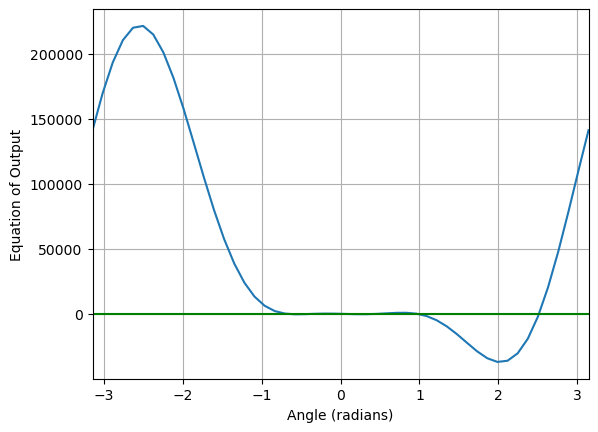

In [393]:
a = -np.pi
b = np.pi

xvalues = np.linspace(a, b)

# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Set x-axis and y-axis labels
plt.xlabel('Angle (radians)')
plt.ylabel('Equation of Output')

# Show the plot
plt.show()

## Centering on curves to find roots

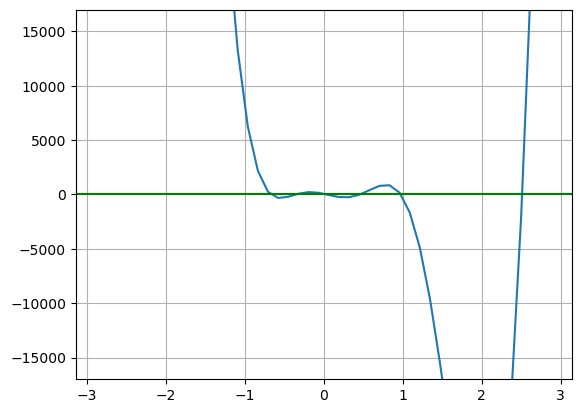

In [394]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

In [395]:
## Centering on curves to find rootsdef bisection(f, a, b, tol, max_iter):
    function_a = f(a)
    function_b = f(b)

    # Check that the function values at a and b have opposite signs
    if function_a * function_b > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    # Iterate using the bisection method
    for i in range(max_iter):
        # Calculate the midpoint and the function value at the midpoint
        c = (a + b) / 2
        function_c = f(c)

        # Update either a or b depending on the sign of f(a)*f(c)
        if function_a * function_c < 0:
            b = c
            function_b = function_c
        else:
            a = c
            function_a = function_c

        # Check if the interval [a, b] is smaller than the tolerance tol
        if (b - a)/2 <= tol:
            break

    # Return the estimate of the root
    return c

## Extract the roots from the functions

Root: -0.673157486370657
Root: -0.3547402704165651
Root: 0.03776676057600378
Root: 0.4588781810485133
Root: 0.9776728949997805
Root: 2.5138527993513557


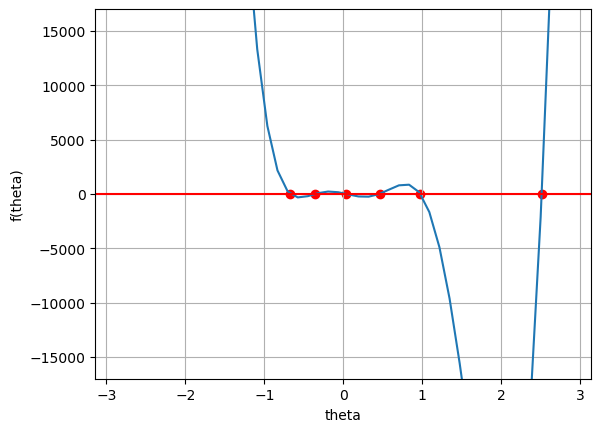

In [396]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
xvalues = np.linspace(-np.pi, np.pi)

yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'r')

# Find the roots of the function
tol = 1e-12
roots = []
for i in range(len(xvalues)-1):
    if forward_kinematics(xvalues[i])*forward_kinematics(xvalues[i+1]) < 0:
        
        a, b = xvalues[i], xvalues[i+1]
        n = int(np.ceil(np.log2((b-a)/tol)))
        
        root = bisection(forward_kinematics, a, b, tol, n)
        
        roots.append(root)
        
        print("Root:", root)

# Plot the roots on the curve
for root in roots:
    plt.scatter(root, forward_kinematics(root), c='red')

# Add a grid to the plot
plt.grid(True)

plt.xlabel("theta")
plt.ylabel("f(theta)")

# Show the plot
plt.show()

- Now we have the six roots extracted from bisection: 

        -0.673157486370657

        -0.3547402704165651

        0.03776676057600378

        0.4588781810485133
        
        0.9776728949997805
        
        2.5138527993513557

In [397]:
def forward_kinematics(theta):
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    gamma = np.pi/4
    p1 = 5
    p2 = 7
    p3 = 3
    
    # Define the coordinates of point 2
    x1=5
    x2=0
    y2=6

    # Calculate the coordinates of point 2 in the Stewart Platform
    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    
    # Calculate the coordinates of point 3 in the Stewart Platform
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    # Calculate the terms for the equations of the circles
    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)
    
    x=N1/D
    y=N2/D
    
    # Calculate the output of the equations of the circles
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return x,y,out

In [398]:
root_1 = -0.673157486370657
values_1 = forward_kinematics(root_1)
values_1

(-4.314759599570059, 2.5264302083997703, -6.344635039567947e-09)

In [399]:
root_2 = -0.3547402704165651
values_2 = forward_kinematics(root_2)
values_2

(-4.804896519073602, 1.383101384928693, -1.9063008949160576e-09)

In [400]:
root_3 = 0.03776676057600378
values_3 = forward_kinematics(root_3)
values_3

(-4.949024616818798, 0.7121483989452148, -1.5688783605583012e-10)

In [401]:
root_4 = 0.4588781810485133
values_4 = forward_kinematics(root_4)
values_4

(-0.8198001690738083, 4.932334911859019, -1.326725396211259e-09)

In [402]:
root_5 = 0.9776728949997805
values_5 = forward_kinematics(root_5)
values_5

(2.303554099145971, 4.43775151538828, 6.108166417106986e-09)

In [403]:
root_6 = 2.5138527993513557
values_6 = forward_kinematics(root_6)
values_6

(3.2156960361507183, 3.8287464009903434, 1.5471596270799637e-07)

In [404]:
theta_list = [i[0:2] for i in [values_1, values_2, values_3, values_4, values_5, values_6]]
print(theta_list)

[(-4.314759599570059, 2.5264302083997703), (-4.804896519073602, 1.383101384928693), (-4.949024616818798, 0.7121483989452148), (-0.8198001690738083, 4.932334911859019), (2.303554099145971, 4.43775151538828), (3.2156960361507183, 3.8287464009903434)]


In [405]:
def stewart_theta_bisection_roots_p_change(x,y,theta):
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)

    gamma = np.pi/4

    p1 = 5
    p2 = 7
    p3 = 3
    
    x1=5
    x2=0
    y2=6

    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)
    
    x = N1/D
    y = N2/D
    
    #output
    out = N1**2 + N2**2 - p1**2*(D**2)
    
    # The points
    u1 = x
    v1 = y

    u2 = x + (L2*np.cos(theta + gamma))
    v2 = y + (L2*np.sin(theta + gamma))

    u3 = x + (L3*np.cos(theta)) 
    v3 = y + (L3*np.sin(theta)) 

    # The Plot 
    plt.plot([u1, u2, u3, u1],[v1, v2, v3, v1], 'r')
    plt.plot([0, x1, x2], [0, 0, y2], 'bo')
    
    plt.plot([0, u1], [0, v1],'g')
  
    plt.plot([x2, u2], [y2, v2],'g')

    plt.plot([x1, u3], [0, v3],'g')

    # Add blue circles at the anchor points
    plt.plot(u1, v1, 'bo', markersize=5)
    plt.plot(u2, v2, 'bo', markersize=5)
    plt.plot(u3, v3, 'bo', markersize=5)
    plt.plot(0, 0, 'bo', markersize=5)
    plt.plot(x1, 0, 'bo', markersize=5)
    plt.plot(x2, y2, 'bo', markersize=5)

    plt.xlim()
    plt.grid(True)

    plt.show()

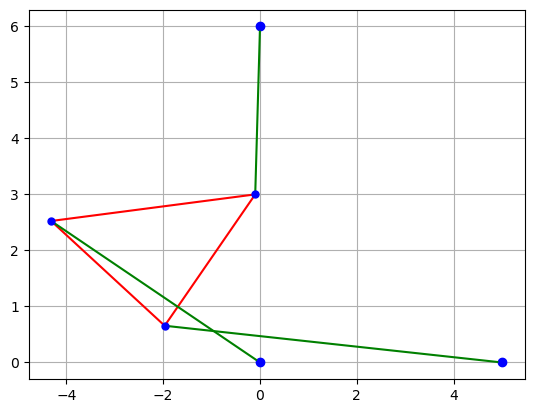

In [406]:
stewart_theta_bisection_roots_p_change(theta_list[0][0],theta_list[0][1],root_1)

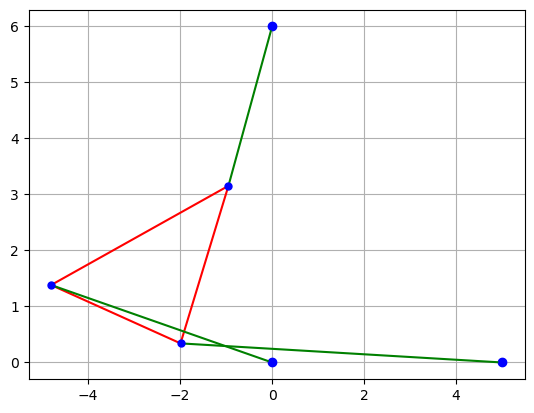

In [407]:
stewart_theta_bisection_roots_p_change(theta_list[1][0],theta_list[1][1],root_2)

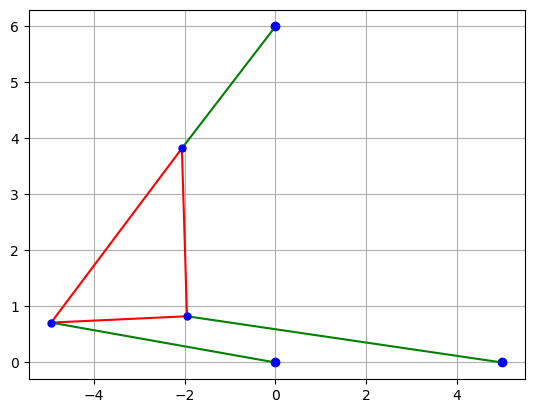

In [408]:
stewart_theta_bisection_roots_p_change(theta_list[2][0],theta_list[2][1],root_3)

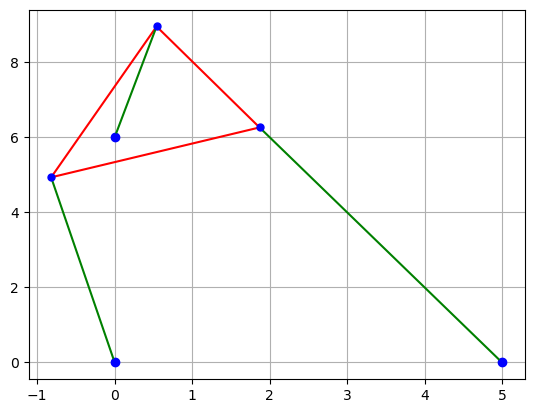

In [409]:
stewart_theta_bisection_roots_p_change(theta_list[3][0],theta_list[3][1],root_4)

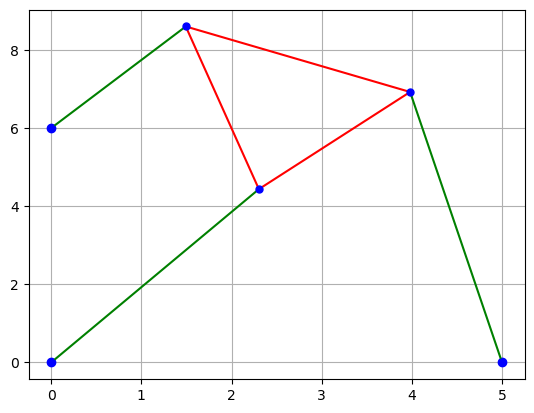

In [410]:
stewart_theta_bisection_roots_p_change(theta_list[4][0],theta_list[4][1],root_5)

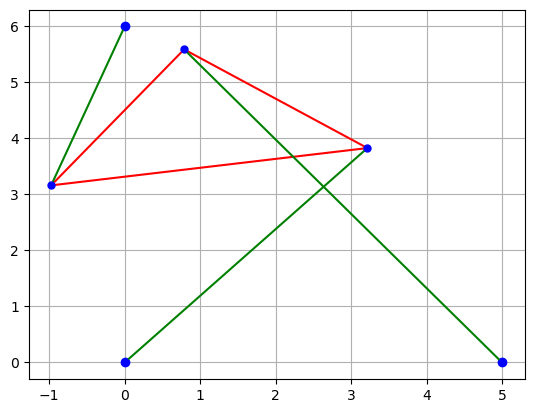

In [411]:
stewart_theta_bisection_roots_p_change(theta_list[5][0],theta_list[5][1],root_6)

## Activity 6

## Find a strut length p2, with the rest of the parameters as in Step 4, for which there are only two poses.

### Case 1 : Strut Length, P2 = 3

In [412]:
def forward_kinematics(theta):
    
    # Define the lengths of the legs
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    
    # Define the angle gamma
    gamma = np.pi/4

    # Define the lengths of the struts
    p1 = 5
    p2 = 3
    p3 = 3

    # Define the coordinates of the fixed points
    x1 = 5
    x2 = 0
    y2 = 6

    # Calculate the coordinates of points A2 and B3
    A2 = L3*np.cos(theta) - x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma))) - x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma))) - y2

    # Calculate the numerator and denominator of the equations for x and y
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)

    # Calculate the coordinates of point P
    x = N1/D
    y = N2/D

    # Calculate the value of the function f(theta)
    out = N1**2 + N2**2 - p1**2*(D**2)

    # Return the value of the function f(theta)
    return out

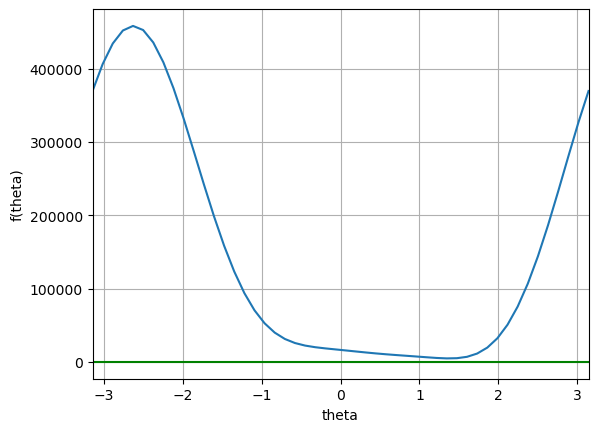

In [413]:
a = -np.pi
b = np.pi

xvalues = np.linspace(a, b)

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])

# Set the x and y labels
plt.xlabel('theta')
plt.ylabel('f(theta)')

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

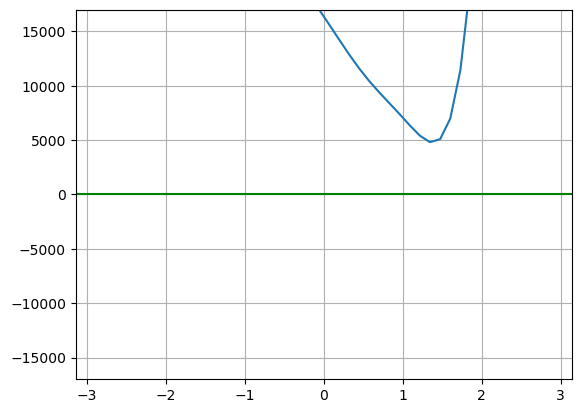

In [414]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

### Case 2: Strut Length, P2 = 4

In [415]:
def forward_kinematics(theta):
    
    # Define the lengths of the legs
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    
    # Define the angle gamma
    gamma = np.pi/4

    # Define the lengths of the struts
    p1 = 5
    p2 = 4
    p3 = 3

    # Define the coordinates of the fixed points
    x1 = 5
    x2 = 0
    y2 = 6

    # Calculate the coordinates of points A2 and B3
    A2 = L3*np.cos(theta) - x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma))) - x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma))) - y2

    # Calculate the numerator and denominator of the equations for x and y
    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)

    # Calculate the coordinates of point P
    x = N1/D
    y = N2/D

    # Calculate the value of the function f(theta)
    out = N1**2 + N2**2 - p1**2*(D**2)

    # Return the value of the function f(theta)
    return out

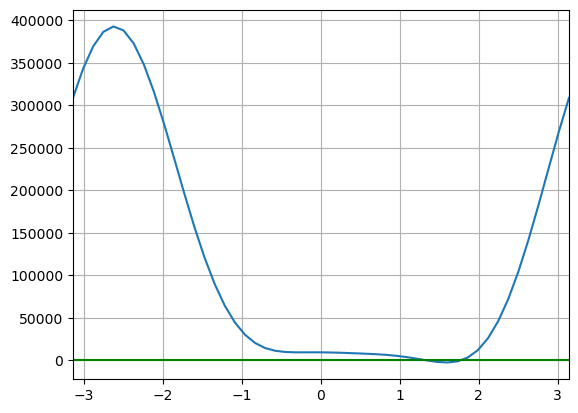

In [416]:
a = -np.pi
b = np.pi

xvalues = np.linspace(a, b)

# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

## Centering on the curves to find the roots

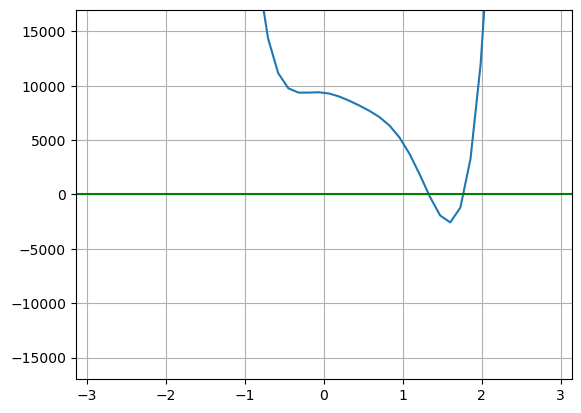

In [417]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'g')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

In [418]:
def bisection(f, a, b, tol, max_iter):
    function_a = f(a)
    function_b = f(b)

    if function_a * function_b > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    for i in range(max_iter):
        c = (a + b) / 2
        function_c = f(c)

        if function_a * function_c < 0:
            b = c
            function_b = function_c
        else:
            a = c
            function_a = function_c

        if (b - a)/2 <= tol:
            break

    return c

## Extract the roots from the functions

Root: 1.3316422033434971
Root: 1.7775135743995185


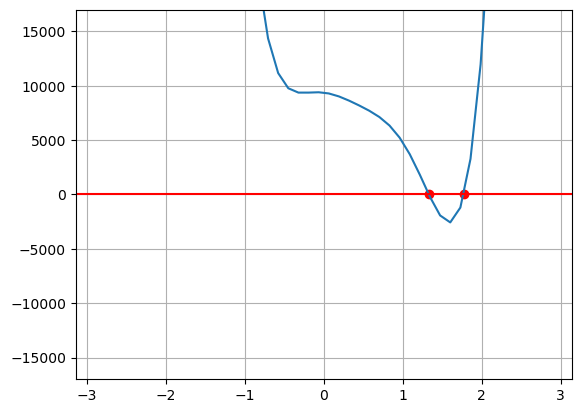

In [419]:
# Set the limits for the x-axis
plt.xlim([-np.pi, np.pi])
plt.ylim([-1.7e4, 1.7e4])

# Evaluate f(theta) at the x_values
xvalues = np.linspace(-np.pi, np.pi)

yvalues = forward_kinematics(xvalues)

# Plot the function f(theta)
plt.plot(xvalues, yvalues)

# Plot the x-axis (y=0)
plt.plot([a,b], [0, 0], 'r')

# Find the roots of the function
tol = 1e-12
roots = []
for i in range(len(xvalues)-1):
    if forward_kinematics(xvalues[i])*forward_kinematics(xvalues[i+1]) < 0:
        
        a, b = xvalues[i], xvalues[i+1]
        n = int(np.ceil(np.log2((b-a)/tol)))
        
        root = bisection(forward_kinematics, a, b, tol, n)
        
        roots.append(root)
        
        print("Root:", root)

# Plot the roots on the curve
for root in roots:
    plt.scatter(root, forward_kinematics(root), c='red')

# Add a grid to the plot
plt.grid(True)

# Show the plot
plt.show()

In [420]:
def forward_kinematics(theta):
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    gamma = np.pi/4
    p1 = 5
    p2 = 4
    p3 = 3
    
    #Inputs based on the fig 1.15 where x1=4, x2=0, y2=4
    x1=5
    x2=0
    y2=6

    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)
    
    x=N1/D
    y=N2/D
    
    #output
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return x,y, out

In [421]:
root_1 = 1.3316422033434971
values_1 = forward_kinematics(root_1)
values_1

(4.890658973004355, 1.039930194658232, -1.1124939192086458e-08)

In [422]:
root_2 = 1.7775135743995185
values_2 = forward_kinematics(root_2)
values_2

(4.899151197793317, 0.9991584164473836, -1.0317307896912098e-08)

In [423]:
theta_list = [i[0:2] for i in [values_1, values_2]]
print(theta_list)

[(4.890658973004355, 1.039930194658232), (4.899151197793317, 0.9991584164473836)]


In [424]:
def stewart_theta_bisection_roots_p_change(x,y,theta):
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)

    gamma = np.pi/4

    p1 = 5
    p2 = 4
    p3 = 3
    
    x1=5
    x2=0
    y2=6

    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    N1 = B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2 = -A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D = 2*(A2*B3 - B2*A3)
    
    x = N1/D
    y = N2/D
    
    #output
    out = N1**2 + N2**2 - p1**2*(D**2)
    
    # The points
    u1 = x
    v1 = y

    u2 = x + (L2*np.cos(theta + gamma))
    v2 = y + (L2*np.sin(theta + gamma))

    u3 = x + (L3*np.cos(theta)) 
    v3 = y + (L3*np.sin(theta)) 

    # The Plot 
    plt.plot([u1, u2, u3, u1],[v1, v2, v3, v1], 'r')
    plt.plot([0, x1, x2], [0, 0, y2], 'bo')
    
    plt.plot([0, u1], [0, v1],'g')
  
    plt.plot([x2, u2], [y2, v2],'g')

    plt.plot([x1, u3], [0, v3],'g')

    # Add blue circles at the anchor points
    plt.plot(u1, v1, 'bo', markersize=5)
    plt.plot(u2, v2, 'bo', markersize=5)
    plt.plot(u3, v3, 'bo', markersize=5)
    plt.plot(0, 0, 'bo', markersize=5)
    plt.plot(x1, 0, 'bo', markersize=5)
    plt.plot(x2, y2, 'bo', markersize=5)

    plt.xlim()
    plt.grid(True)

    plt.show()

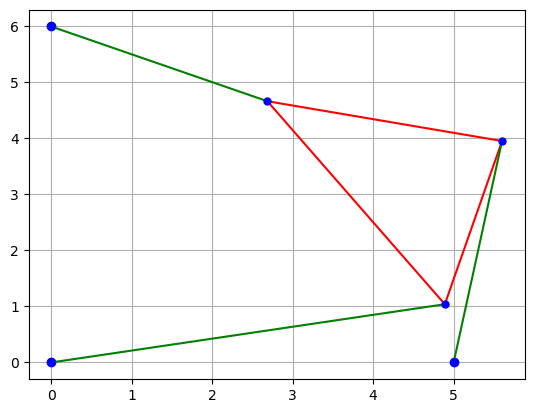

In [425]:
stewart_theta_bisection_roots_p_change(theta_list[0][0],theta_list[0][1],root_1)

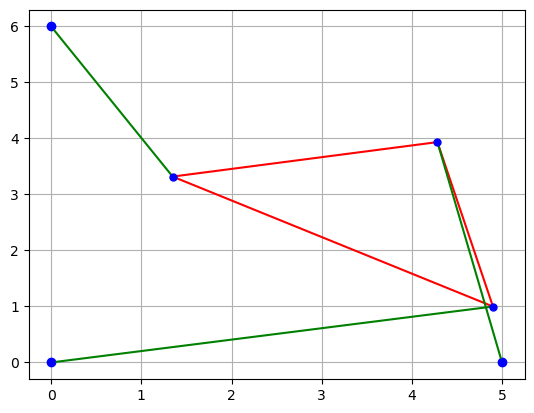

In [426]:
stewart_theta_bisection_roots_p_change(theta_list[1][0],theta_list[1][1],root_2)

## Activity 7

## Calculate the intervals in p2, with the rest of the parameters as in Step 4, for which there are 0,2, 4, and 6 poses, respectively.

In [427]:
def forward_kinematics_p2_poses(p2,theta):
    
    # Define the lengths and distances of the Stewart platform
    L1 = L3 = 3
    L2 = 3 * np.sqrt(2)
    gamma = np.pi/4
    p1 = 5
    p3 = 3
    
    # Define the anchor point positions
    x1=5
    x2=0
    y2=6

    A2 = L3*np.cos(theta)-x1
    B2 = L3*np.sin(theta)
    A3 = L2*((np.cos(theta)*np.cos(gamma))-(np.sin(theta)*np.sin(gamma)))-x2
    B3 = L2*((np.cos(theta)*np.sin(gamma))+(np.sin(theta)*np.cos(gamma)))-y2

    N1= B3*(p2**2 - p1**2 - A2**2 - B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=-A3*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3 - B2*A3)
    
    x=N1/D
    y=N2/D
    
    #output
    out=N1**2 + N2**2 - p1**2*(D**2)
    
    return out

In [428]:
def bisection(f, a, b, tol, max_iter):
    function_a = f(a)
    function_b = f(b)

    # Check that the function values at a and b have opposite signs
    if function_a * function_b > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    # Iterate using the bisection method
    for i in range(max_iter):
        # Calculate the midpoint and the function value at the midpoint
        c = (a + b) / 2
        function_c = f(c)

        # Update either a or b depending on the sign of f(a)*f(c)
        if function_a * function_c < 0:
            b = c
            function_b = function_c
        else:
            a = c
            function_a = function_c

        # Check if the interval [a, b] is smaller than the tolerance tol
        if (b - a)/2 <= tol:
            break

    # Return the estimate of the root
    return c

## Number of roots for different p2 values

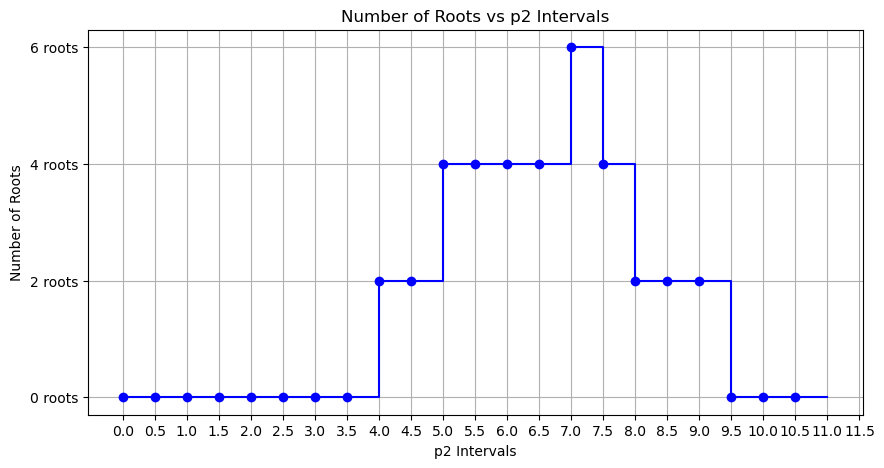

In [429]:
def find_num_roots(p2):
    # This function finds the number of roots of the forward kinematics function for the given p2 value
    
    # Set the tolerance level for the bisection method
    tol = 1e-6
    
    # Create an array of x values between -pi and pi
    xvalues = np.linspace(-np.pi, np.pi)
    
    # Initialize an empty list to store the roots
    roots = []
    
    # Iterate through the x values to find where the function changes sign
    for i in range(len(xvalues)-1):
        if forward_kinematics_p2_poses(p2, xvalues[i])*forward_kinematics_p2_poses(p2, xvalues[i+1]) < 0:
            
            # Use the bisection method to find the root of the function within the given interval
            
            # Set the endpoints of the interval
            a = xvalues[i]
            b = xvalues[i+1]
            
            # Set the number of iterations for the bisection method
            n = 10*(int(np.ceil(np.log2((b-a)/tol))))
            
            # Use the bisection method to find the root of the function within the given interval
            root = bisection(lambda x: forward_kinematics_p2_poses(p2=p2, theta=x), a, b, tol, n)
            roots.append(root)
    
    # Count the number of roots found
    n_roots = len(roots)
    
    return n_roots


# Define the intervals for p2
p2_intervals = np.arange(0, 11, 0.5)

# Calculate the number of roots for each p2 interval
num_roots = [find_num_roots(p2) for p2 in p2_intervals]

# Find the p2 interval ranges for each number of roots
root_ranges = {0:[], 2:[], 4:[], 6:[]}

for i in range(len(num_roots)):
    root_ranges[num_roots[i]].append(p2_intervals[i])
    
# Plot the root ranges
plt.figure(figsize=(10, 5))

# Create an array of x values to plot the number of roots
x = np.linspace(0, 11, len(p2_intervals)+1)

# Create an array of y values for the number of roots
y = [0] + [i for i in num_roots]

# Plot the number of roots as a step function
plt.plot(x, y, drawstyle='steps', color='blue')

# Plot the p2 interval ranges for each number of roots found
for i, j in enumerate(root_ranges):
    roots = root_ranges[j]
    plt.plot(roots, [i*2]*len(roots), 'o', color='blue')

plt.grid()

plt.xlabel('p2 Intervals')
plt.xticks(np.arange(0, 12, 0.5))

plt.ylabel('Number of Roots')
plt.yticks(np.arange(0, 8, 2), ['0 roots', '2 roots', '4 roots', '6 roots'])

plt.title('Number of Roots vs p2 Intervals')

plt.show()

## P2 Intervals Range

In [430]:
# Define the intervals for p2
p2_intervals = np.arange(0, 11, 0.5)

# Calculate the number of roots for each p2 interval
num_roots = [find_num_roots(p2) for p2 in p2_intervals]

# Find the p2 interval ranges for each number of roots
given_roots = {0:[], 2:[], 4:[], 6:[]}

# Append the interval for each root
for i in range(len(num_roots)):
    given_roots[num_roots[i]].append(p2_intervals[i])

# Combine intervals with the same number of roots and sort by x1 and x2
groups = []

# Iterate over the roots and intervals
for m in sorted(given_roots.keys()):
    roots = given_roots[m]
    
    # Append a single interval if no roots
    if len(roots) == 0:
        groups.append((m, p2_intervals[0], p2_intervals[-1]))
    else:
        r0, r1 = roots[0], roots[-1]
        
        # If more than two roots are there, check if any roots should be grouped together
        if len(roots) > 2:
            for i in range(1, len(roots)-1):
                if find_num_roots((roots[i-1]+roots[i])/2) == m:
                    r1 = roots[i]
                else:
                    groups.append((m, r0, r1))
                    r0, r1 = roots[i], roots[i]
            
            # Append the final root interval        
            if find_num_roots((roots[-2]+roots[-1])/2) == m:
                r1 = roots[-1]
            else:
                groups.append((m, r0, r1))
                r0, r1 = roots[-1], roots[-1]
        
        # Append the root interval
        groups.append((m, r0, r1))

# Print the intervals
print('Number of roots\t Start_Interval\t End_Interval')
for i in groups:
    print(f'{i[0]}\t\t {i[1]:.4f}\t\t {i[2]:.4f}')

Number of roots	 Start_Interval	 End_Interval
0		 0.0000		 3.5000
0		 9.5000		 10.5000
2		 4.0000		 4.5000
2		 8.0000		 9.0000
4		 5.0000		 6.5000
4		 7.5000		 7.5000
6		 7.0000		 7.0000


### The above code computes the number of roots for a given interval of the p2 parameter in a forward kinematics function, and then plots a step function showing the number of roots as a function of the p2 parameter. 

### The step function has discrete steps at the intervals where the number of roots changes, and each step is labeled with the number of roots it represents.

### Additionally, the code also plots markers at the p2 values where the number of roots changes. The x-axis represents the p2 parameter, and the y-axis represents the number of roots, with the tick labels indicating the number of roots at each step.
